# Pandas Profiling

- Pandas Profiling 
- Datasist - visualization

In [1]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas_profiling import ProfileReport
import datasist as ds  

%matplotlib inline
plt.style.use('seaborn-whitegrid') 

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

## Data

In [2]:
# reading Telecom customers dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# checking shape of the df
df.shape

(7043, 21)

In [4]:
# checking number of nan values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# checking unique values
df.nunique()

customerID          7043
gender              2   
SeniorCitizen       2   
Partner             2   
Dependents          2   
tenure              73  
PhoneService        2   
MultipleLines       3   
InternetService     3   
OnlineSecurity      3   
OnlineBackup        3   
DeviceProtection    3   
TechSupport         3   
StreamingTV         3   
StreamingMovies     3   
Contract            3   
PaperlessBilling    2   
PaymentMethod       4   
MonthlyCharges      1585
TotalCharges        6531
Churn               2   
dtype: int64

In [6]:
# defining target col
target_col = ['Churn']
# defining categorical cols
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
# processing categorical coluns
cat_cols   = [x for x in cat_cols if x not in target_col]
# defining numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col]
# defining binary columns
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
# defining multiple values column
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [7]:
# printing cols
print("categorical {}".format(cat_cols))
print("continuous {}".format(num_cols))
print("binary categorical {}".format(bin_cols))
print("multi categorical {}".format(multi_cols))

categorical ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
continuous ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
binary categorical ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
multi categorical ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


# Pandas Profiling

In [8]:
# rendering the report in the jupyter notebook
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [9]:
# creating a pandas profiling report
designReport = ProfileReport(df, title = "Customer Churn", 
                             correlations={"cramers": {"calculate": True},
                                           "spearman": {"calculate": True},
                                           "kendall": {"calculate": False},
                                           "phi_k": {"calculate": False},
                                           "recoded": {"calculate": True},
                                           "pearson": {"calculate": True}},
                            samples = {"head": 10, "tail": 5})

In [10]:
# saving report in a html file
designReport.to_file('report.html')

In [11]:
# showing report
designReport.to_widgets()

To view [Profile Report parameters](https://github.com/pandas-profiling/pandas-profiling/blob/master/src/pandas_profiling/config_default.yaml)

# Datasist

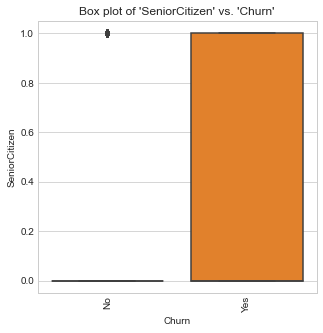

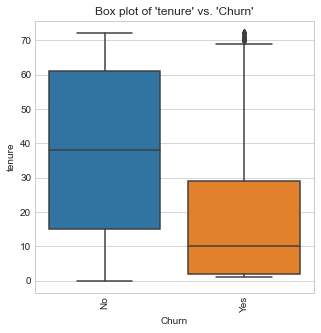

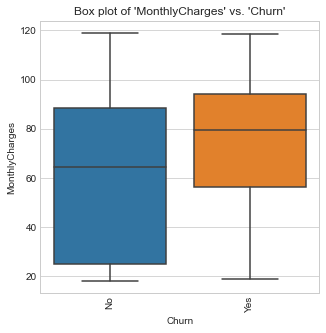

In [12]:
# using datasist to create a box plot
ds.visualizations.boxplot(df, target = 'Churn')

## Categorical Features Visualizations

customerID feature has too many categories and will not be ploted
TotalCharges feature has too many categories and will not be ploted


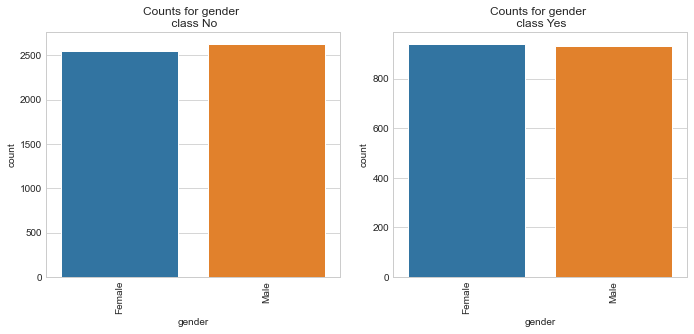

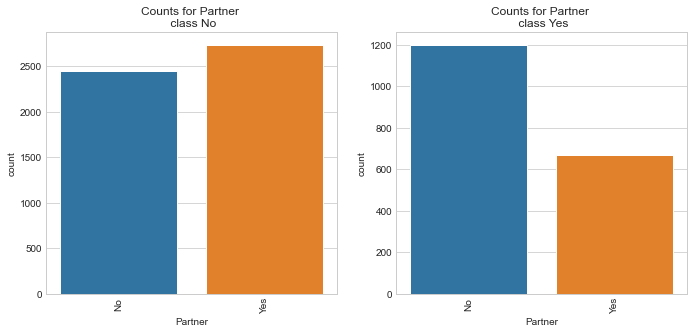

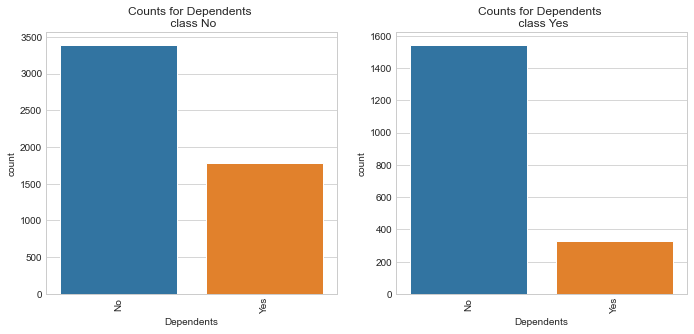

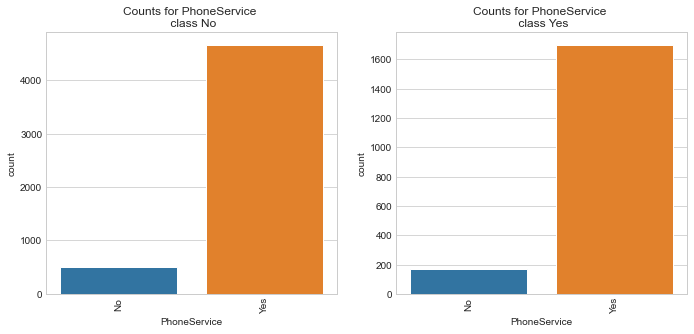

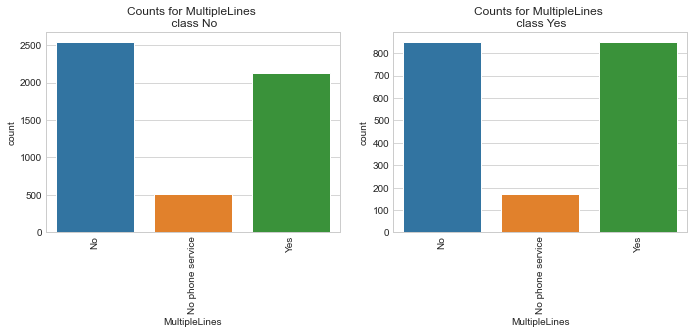

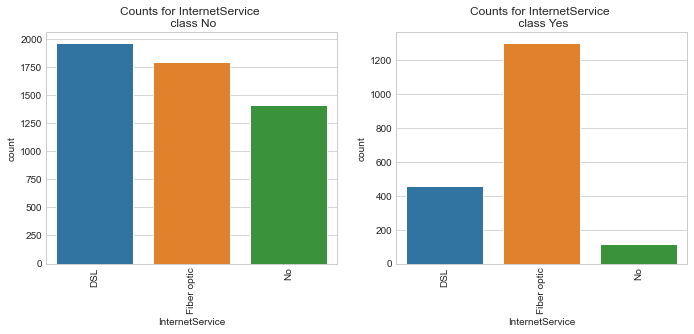

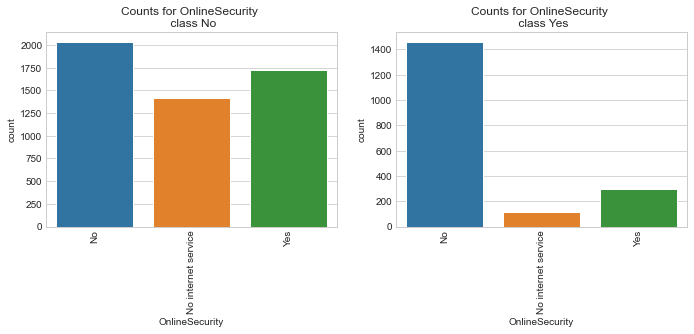

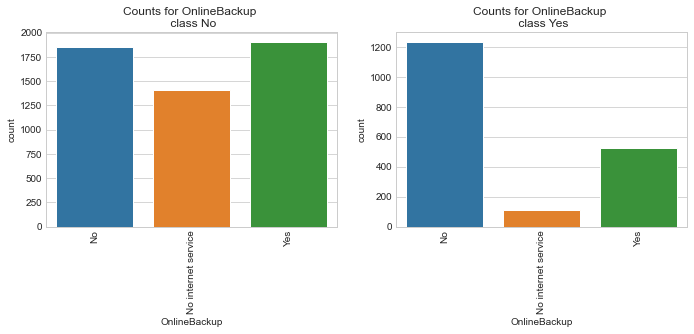

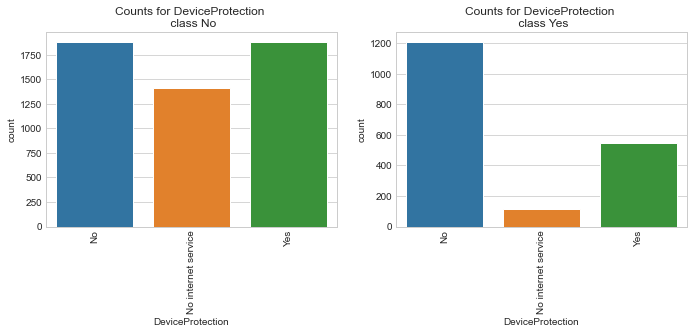

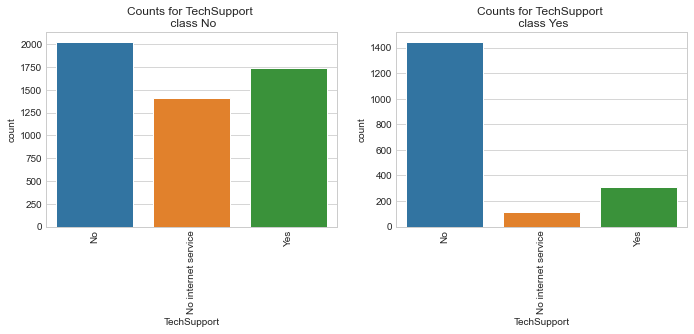

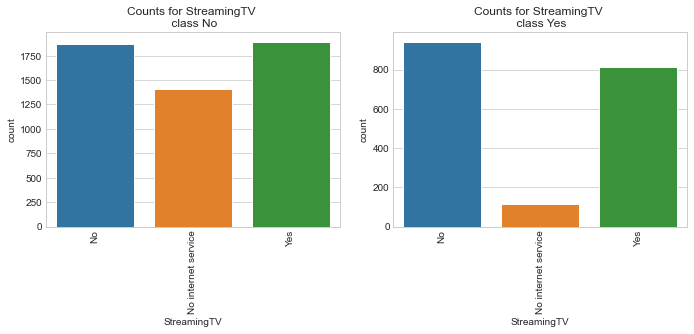

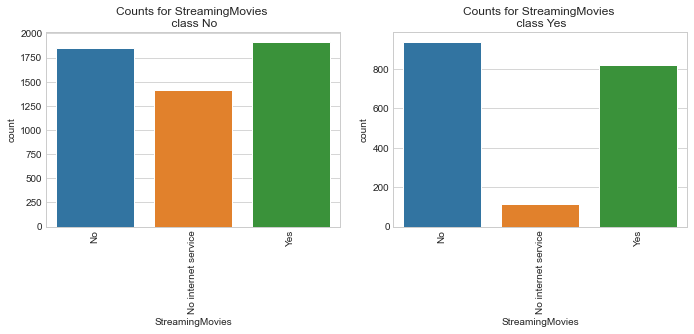

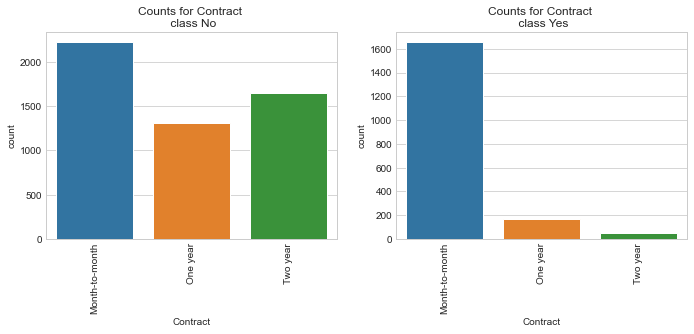

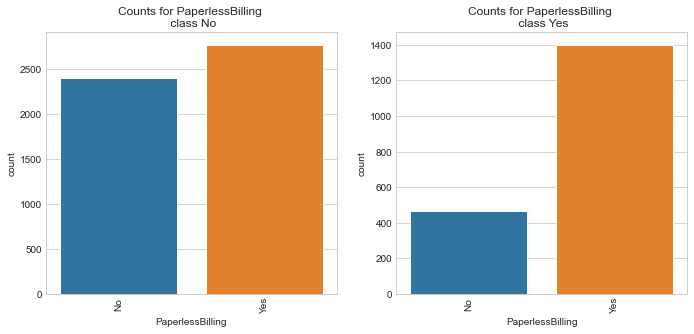

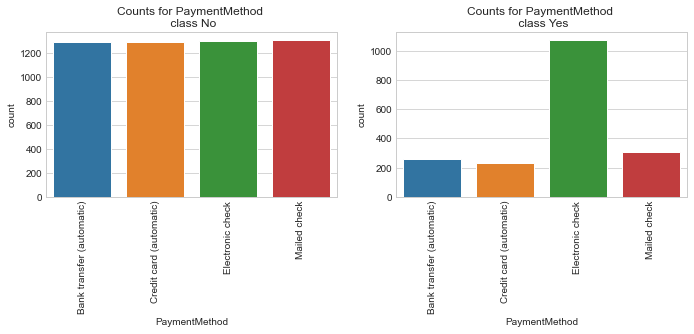

In [13]:
# plotting cat features
ds.visualizations.catbox(df, target = 'Churn', save_fig = False)